# Part 2.12: Supervised Learning - Random Forest Classifier

The Random Forest Classifier is an ensemble of Decision Tree Classifiers. It builds multiple decision trees on different sub-samples of the dataset and uses averaging (or majority vote) to improve the predictive accuracy and control overfitting.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate a dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=0, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Training a Random Forest Classifier

In [2]:
# n_estimators is the number of trees in the forest
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
forest_clf.fit(X_train, y_train)

print(f"Accuracy on test set: {forest_clf.score(X_test, y_test):.4f}")

Accuracy on test set: 0.9200


### Feature Importance
A great benefit of Random Forests is that they provide a measure of feature importance. This is calculated based on how much each feature contributes to reducing impurity across all the trees in the forest.

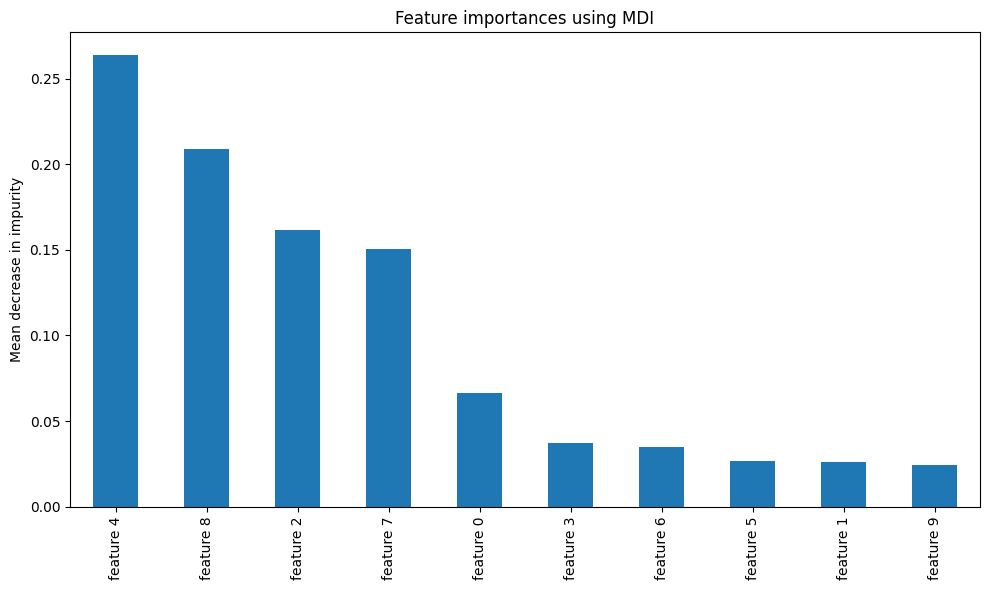

In [3]:
importances = forest_clf.feature_importances_
feature_names = [f'feature {i}' for i in range(X.shape[1])]

forest_importances = pd.Series(importances, index=feature_names)
forest_importances = forest_importances.sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()